## IA376I – Tópicos em Engenharia de Computação VII
### Tópico: Análise de Dados Visual (Visual Analytics)
**Professora:** Wu, Shin - Ting<br>
**Aluno:** Luiz Roberto Albano Junior **RA:** 272746<br>

**Atividade** 4 - 22/03/2024

---

#### Exercício 1

Da coleção de ilusões ópticas do Museu Americano de História Natual, identifique duas ilusões ópticas que você considera mais promissoras em termos de potencial para aprimorar a visualização de dados. Justifique sua escolha.

Após avançar pela coleção de ópticas considero que as duas mais promissoras para o aprimoramento da visualização de dados sejam a seleção e cores. 

A seleção como forma de manter a atenção do cérebro para o que precisa ser interpretado e identificado, sem causar confusões. Já as cores possuem papel importante na percepção de mudanças de informações.

---

#### Exercício 2

Nas seções 11.1 a 11.12 em [34], o estatístico Rafael A. Irizarry destaque 11 conjuntos de problemas que podem aparecer nos gráficos gerados pela biblioteca ggplot2 (R)/plotnine (Python) e discute, quando pertinentes, soluções em R para controná-los. Porte essas soluções em R para Python.

**Resposta:**<br>
 Na seção 11 o autor aborda sobre alguns princípios para a visualização de dados, baseados na forma como os humanos detectam padrões e fazem comparações visuais. O autor apresenta alguns pontos-chave, como:<br>

**Codificação visual:** são apresentados alguns métodos para representar os dados como posição, comprimento, ângulos, área, brilho e cor<br>
**Incluir zeros:** enfatiza a importância de começar as barras de gráficos em zero para evitar distorções na representação de quantidades.<br>
**Não distorcer quantidades:** alerta contra o uso de gráficos que distorcem a percepção das quantidades, como gráficos de área onde o tamanho não corresponde à proporção real<br>
**Ordenação de categorias:** sugere ordenar categorias de forma significativa, não alfabeticamente, para facilitar comparações e interpretações.<br>

Outros pontos importantes que encontrei na leitura é a questão da escolha de cores adequadas para pessoas com daltonismo e a importância de mostrar os dados reais para permitir comparações precisas entre grupos. Também foi abordado uso de transformações, como logarítimica, para melhorar a visualização de certos tipos de dados.

---

#### Exercício 3

Na seção 11.14 em [34], o estatístico Rafael A. Irizarry explora, sob a perspectiva dos princípios de percepção e cognição, diferentes abordagens para visualizar os dados relacionados aos casos de sarampo nos estados dos Estados Unidos entre 1928 e 2011, utilizando o conjunto de dados us contagious diseases [47]. O objetivo é demonstrar a efetividade das vacinas na erradicação do sarampo. Porte as alternativas em R, apresentadas por Irizarry, para Python. Faça uma análise crítica dessas alternativas, considerando a possibilidade de outras abordagens mais eficientes e assertivas para alcançar o objetivo proposto.

Importação da base de dados

In [7]:
from plotnine import *
import pandas as pd
import pyreadr

result = pyreadr.read_r('us_contagious_diseases.rda')
us_diseases = result['us_contagious_diseases']
us_diseases


,disease,state,year,weeks_reporting,count,population
0,Hepatitis A,Alabama,1966.0,50.0,321.0,3345787.0
1,Hepatitis A,Alabama,1967.0,49.0,291.0,3364130.0
2,Hepatitis A,Alabama,1968.0,52.0,314.0,3386068.0
3,Hepatitis A,Alabama,1969.0,49.0,380.0,3412450.0
4,Hepatitis A,Alabama,1970.0,51.0,413.0,3444165.0
...,...,...,...,...,...,...
16060,Smallpox,Wyoming,1948.0,24.0,1.0,280803.0
16061,Smallpox,Wyoming,1949.0,0.0,0.0,285544.0
16062,Smallpox,Wyoming,1950.0,1.0,2.0,290529.0
16063,Smallpox,Wyoming,1951.0,1.0,1.0,295744.0


Cria um DataFrame apenas com os dados sobre sarampo

In [186]:
the_disease = "Measles"
states = ["Hawaii", "Alaska"]
measles = us_diseases[ (~us_diseases['state'].isin(states)) & (us_diseases['disease'] == the_disease) ]
measles['rate'] = measles['count'] / measles['population'] * 10000 * 52 / measles['weeks_reporting']

measles['temp'] = measles.apply(lambda row: row['rate'] if row['year'] <= 1963 else None, axis=1)
#measles['state'] = measles.groupby('state')['temp'].transform('median')
measles.sort_values(by='state', inplace=True)
measles.drop(columns=['temp'], inplace=True)

measles

C:\Users\junio\AppData\Local\Temp\ipykernel_21436\1847362696.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\junio\AppData\Local\Temp\ipykernel_21436\1847362696.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\junio\AppData\Local\Temp\ipykernel_21436\1847362696.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

,disease,state,year,weeks_reporting,count,population,rate
2346,Measles,Alabama,1928.0,52.0,8843.0,2589923.0,34.143872
2400,Measles,Alabama,1982.0,11.0,2.0,3942588.0,0.023981
2399,Measles,Alabama,1981.0,22.0,0.0,3921581.0,0.000000
2398,Measles,Alabama,1980.0,46.0,22.0,3893888.0,0.063868
2397,Measles,Alabama,1979.0,49.0,129.0,3858703.0,0.354777
...,...,...,...,...,...,...,...
6117,Measles,Wyoming,1949.0,49.0,558.0,285544.0,20.738074
6116,Measles,Wyoming,1948.0,41.0,2167.0,280803.0,97.876100
6115,Measles,Wyoming,1947.0,46.0,440.0,276297.0,18.002052
6122,Measles,Wyoming,1954.0,44.0,1148.0,311578.0,43.543744


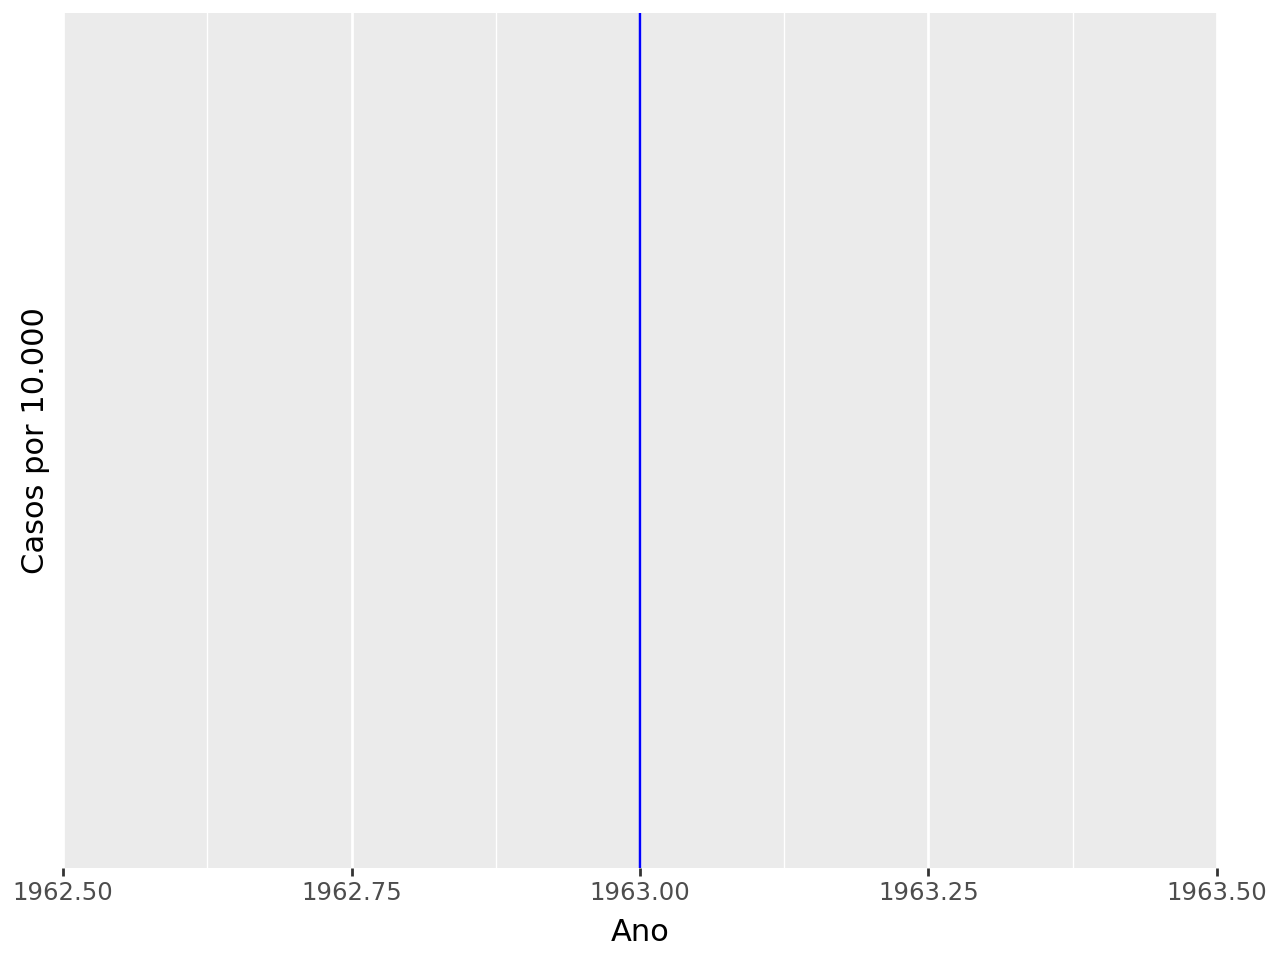

In [185]:
graph1 = measles[ (measles['state'] == "California") & measles['rate'].notnull() ]
(
    ggplot(data=graph1,
           mapping=aes(x="year", y="rate") ) +
    geom_line() + 
    ylab("Casos por 10.000") + 
    xlab("Ano") +
    geom_vline(xintercept=1963, color="blue")
)

Gráfico usando uma paleta sequêncial que exibe dados de todos os estados em um gráfico

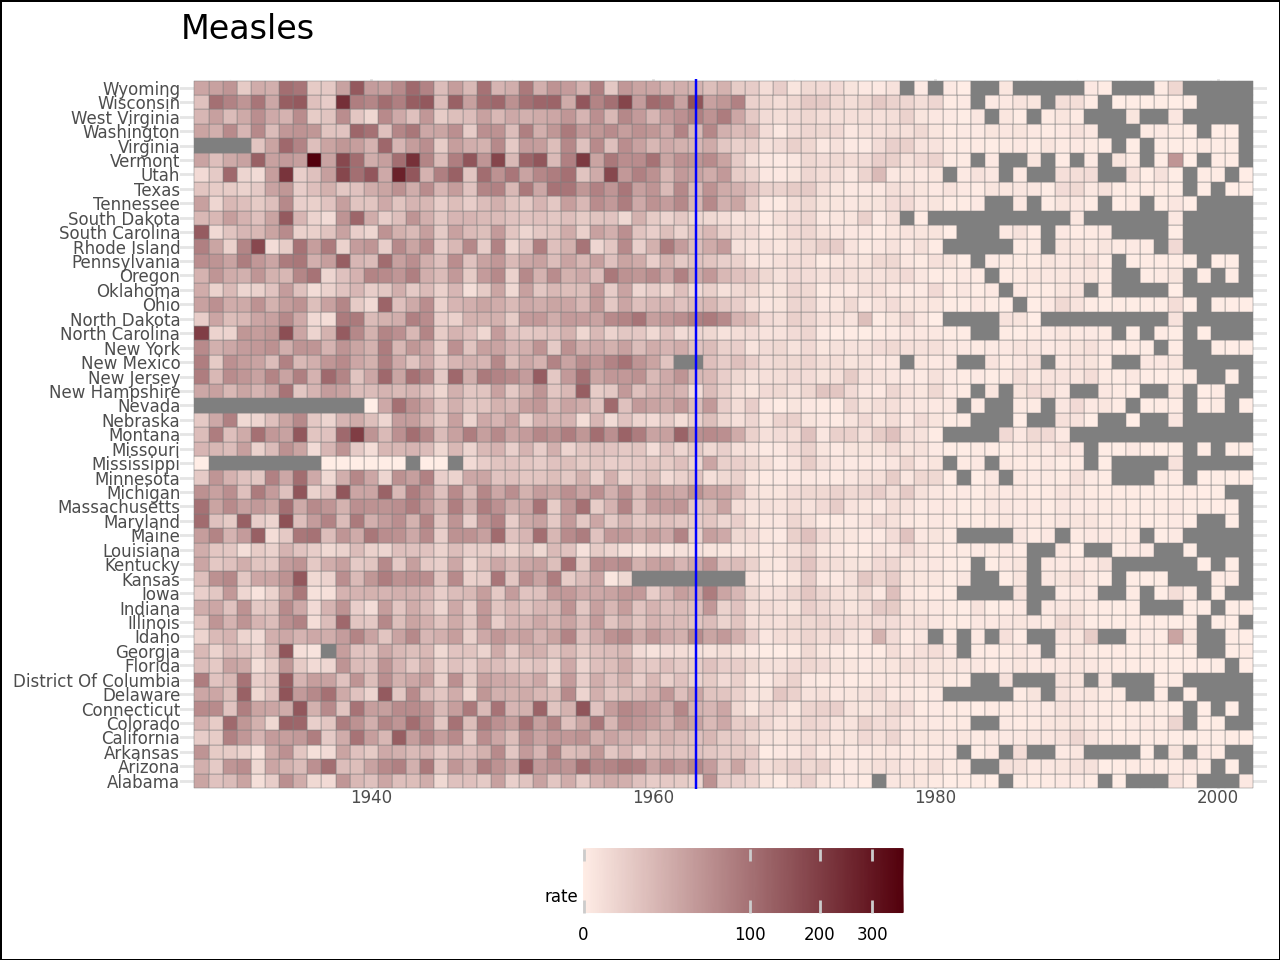

In [109]:
(
    ggplot(data=measles,
           mapping=aes(x="year", y="state", fill="rate") ) +
    geom_tile(color = "#7f7f7f") +
    scale_x_continuous(expand=[0,1]) +
    scale_fill_gradient(low="#FFEDE6", high="#53000C", trans = "sqrt") +
    geom_vline(xintercept=1963, color = "blue") +
    theme_minimal() + 
    theme(plot_background=element_rect(fill="white"), 
          legend_position="bottom", text=element_text(size=6, margin={"t":5}),
          plot_title=element_text(size=12, ha="left", margin={"t": 1, "b": 1, "units": "lines"})
          ) +
    labs(title = "Measles", x="", y="")
)

Exibe o gráfico com valores por posição

In [182]:
avg = us_diseases[ us_diseases['disease'] == the_disease]
avg['population'].fillna(0)
avg['count'].fillna(0)

us_avg =  avg.groupby('year')['count'].sum() / avg.groupby('year')['population'].sum() * 10000
us_avg.rename(index={0:"year", 1:"us_rate"})
us_avg = us_avg.reset_index(name='us_rate')
us_avg

,year,us_rate
0,1928.0,40.355599
1,1929.0,27.940243
2,1930.0,31.325340
3,1931.0,35.355627
4,1932.0,31.192597
...,...,...
70,1998.0,0.002111
71,1999.0,0.002193
72,2000.0,0.001990
73,2001.0,0.002565


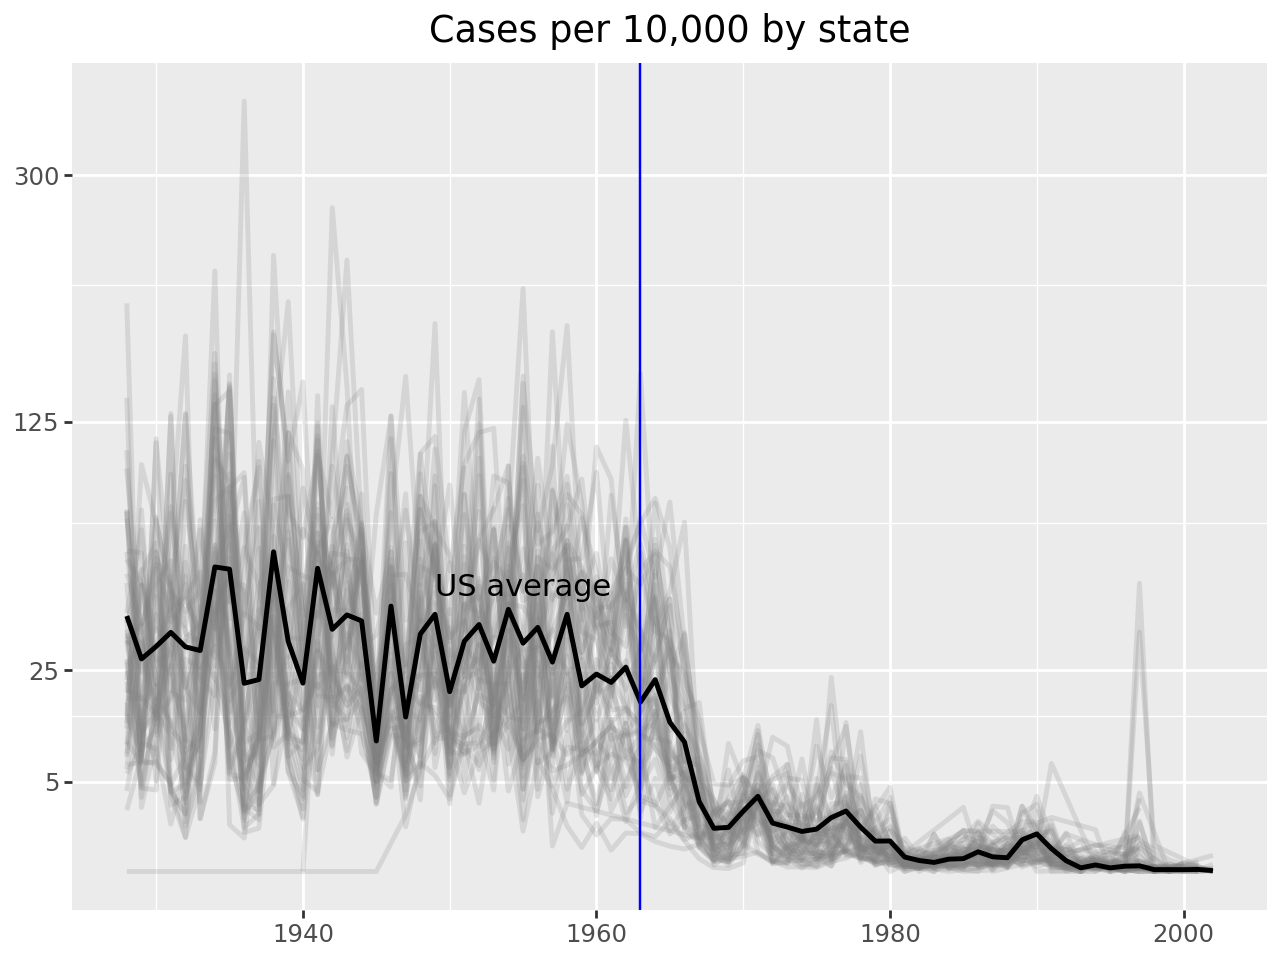

In [183]:
import matplotlib.pyplot as plt
import numpy as np

filtered_measles = measles[ measles['rate'].notnull() ]

(
    ggplot(data=filtered_measles) + 
    geom_line(aes(x="year", y="rate", group="state"),  color="grey", 
              show_legend=False, alpha = 0.2, size = 1) +
    geom_line(mapping = aes(x="year", y="us_rate"),  data=temp, size = 1) +
    scale_y_continuous(trans="sqrt", breaks = [5, 25, 125, 300]) + 
    ggtitle("Cases per 10,000 by state") + 
    xlab("") + ylab("") +
    geom_text(data=pd.DataFrame({"x": [1955], "y": [50]}), 
            mapping = aes(x="x", y="y", label=["US average"]), 
            color="black") + 
    geom_vline(xintercept=1963, color="blue")
)

